In [36]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report,precision_score, accuracy_score
import seaborn as sns 


In [2]:
# Load the dataset
file_path = "../data/water_potability.csv"
data = pd.read_csv(file_path)

# check the first few rows of the dataset
data.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:

# get information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# get a description of the dataset
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [5]:
# Check for missing values
missing_values = data.isnull().sum()

missing_values

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

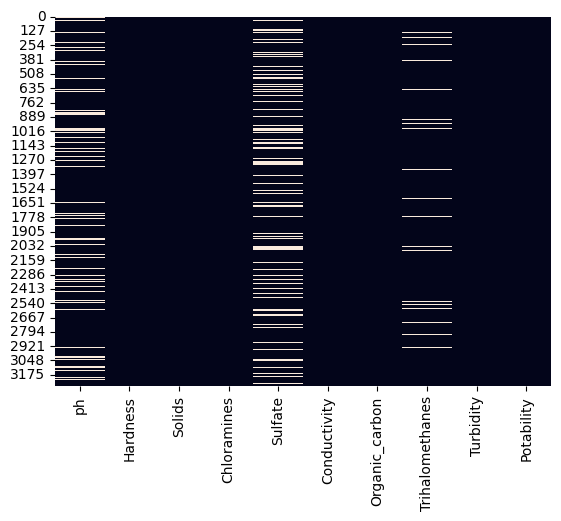

In [6]:
sns.heatmap(data.isnull(), cbar=False)

<Axes: xlabel='Turbidity', ylabel='Density'>

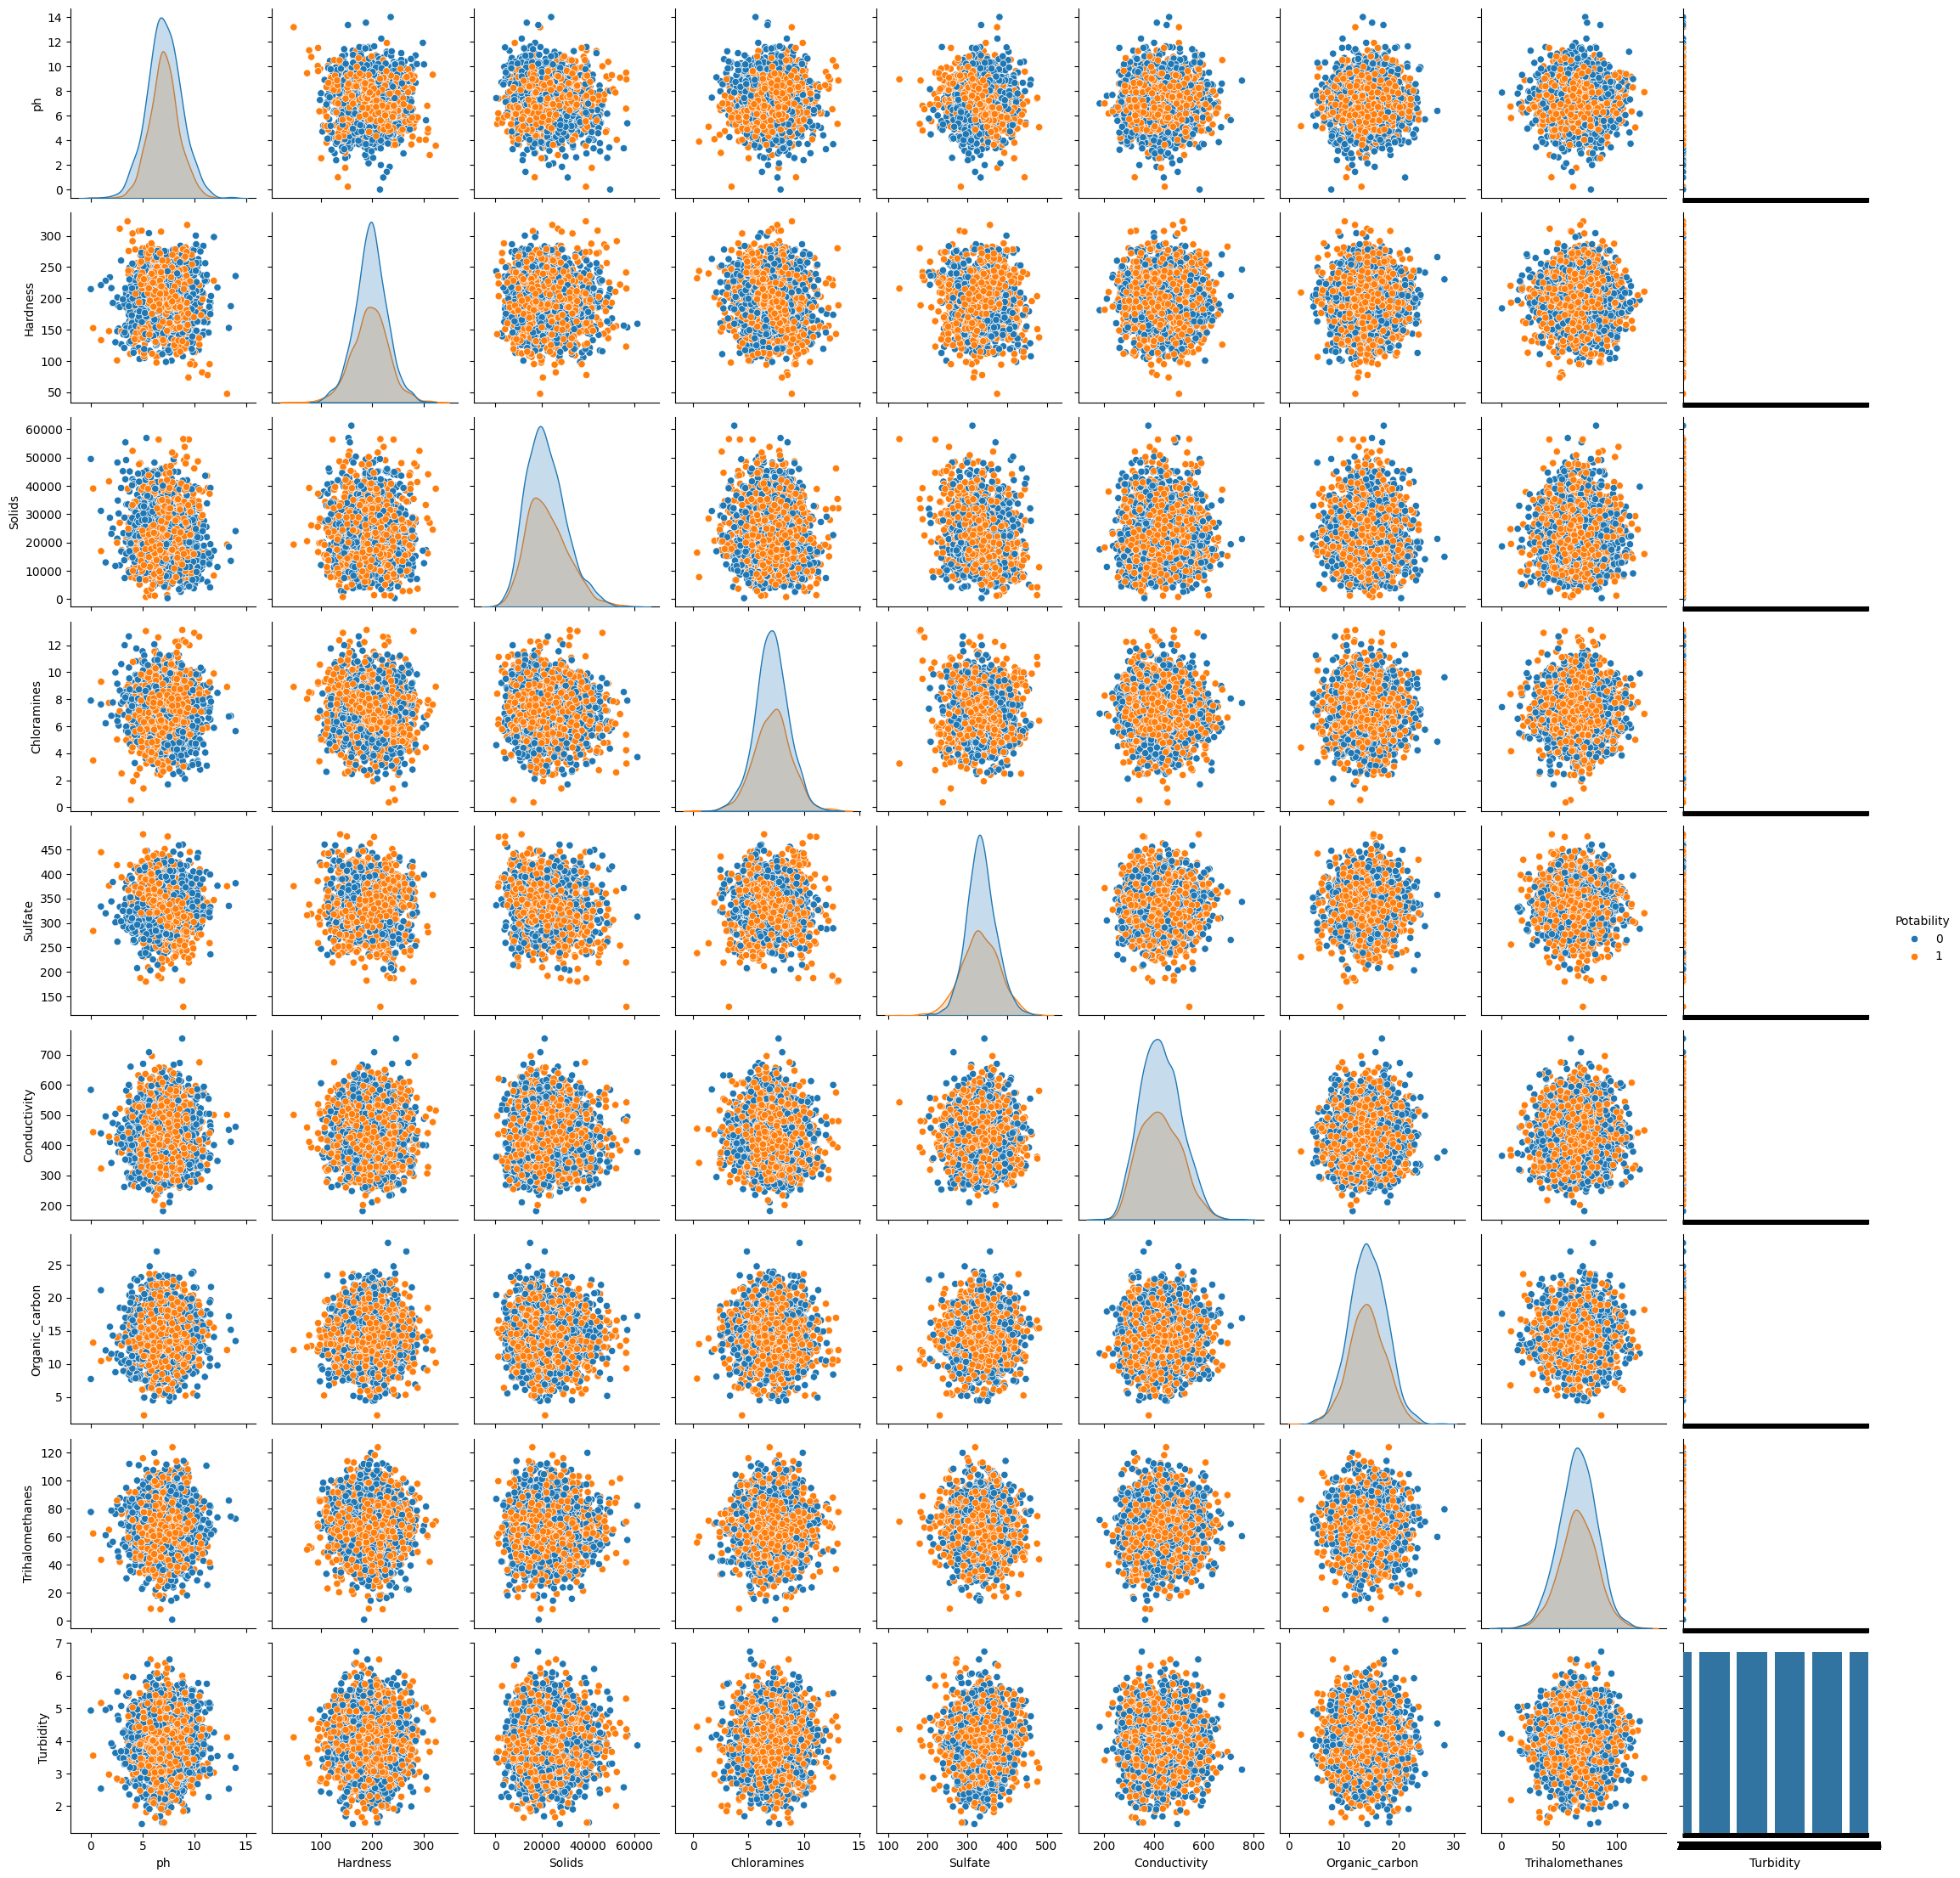

In [7]:
# see the parlors of all the values in the dataset to see the distribution of the data
sns.pairplot(data, hue="Potability")

# check the distribution of the target variable
sns.countplot(data['Potability'])


<Axes: ylabel='count'>

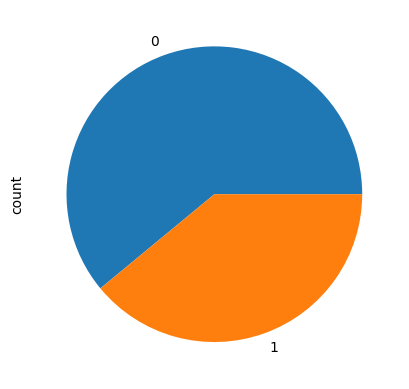

In [8]:
# show a bar graph of the Potability column
data['Potability'].value_counts().plot(kind='pie')

In [9]:
# fill the missing data with the mean of the column
data = data.fillna(data.mean())

In [10]:
# Data Preprocessing
target_column = "Potability"
X = data.drop(target_column, axis=1)
Y = data[target_column]

X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [11]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(X_scaled, Y, test_size=0.3, random_state=101)

In [12]:
trainX

array([[-0.80616455, -0.28033313,  1.72279714, ..., -0.86913082,
         0.69067864, -0.39362764],
       [-0.50348341, -1.15671642, -0.767161  , ..., -1.52611114,
        -1.79435053,  1.91194887],
       [-1.98654131, -0.44511701,  0.43358001, ..., -1.49399898,
        -1.25309938,  0.25818979],
       ...,
       [-1.47938774, -0.68716391, -0.8244282 , ..., -1.96788075,
        -1.75056486, -1.04380313],
       [-0.58732464,  0.22320252, -0.73186741, ...,  0.09437927,
         0.2825236 ,  0.23502418],
       [ 0.41136922,  1.03320083, -1.67548782, ..., -0.01542441,
         0.48659444,  0.27221703]])

In [44]:

# Model Architecture
model = Sequential(
    [
        Dense(64, activation="relu", input_shape=(trainX.shape[1],), kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),
        
        Dense(32, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(16, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(8, activation="relu", kernel_regularizer=l2(0.001)),
        BatchNormalization(),
        Dropout(0.3),
        
        Dense(1, activation="sigmoid")
    ]
)

/home/it/anaconda3/envs/my_tens/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
# Early Stopping

early_stopping = EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=10, min_lr=0.0001)


In [46]:
# Compile the model
optimizer = Adam(learning_rate=0.001)

model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])


In [47]:
# Train the model
history = model.fit(
    trainX,
    trainY,
    validation_split=0.3,
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],
)


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5116 - loss: 0.9502 - val_accuracy: 0.5930 - val_loss: 0.7707 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5315 - loss: 0.8568 - val_accuracy: 0.5916 - val_loss: 0.7674 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5364 - loss: 0.8758 - val_accuracy: 0.6047 - val_loss: 0.7647 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5480 - loss: 0.8432 - val_accuracy: 0.5974 - val_loss: 0.7637 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5604 - loss: 0.8078 - val_accuracy: 0.6017 - val_loss: 0.7657 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5649 - loss: 0.8018 - val_accuracy: 0.6076 - val_loss: 0.7630 - learning_rate: 0.0010
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5585 - loss: 0.7995 - val_acc

In [48]:
# Model Evaluation
evaluation = model.evaluate(testX, testY)
test_loss = evaluation[0]
test_accuracy = evaluation[1]

print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6857 - loss: 0.6456
Test Loss: 0.6528621315956116, Test Accuracy: 0.6795523762702942


In [49]:
# lets print the confusion matrix and classification report
predictions = model.predict(testX)
predictions = np.round(predictions)

# classification report 
print(classification_report(testY, predictions))
print(confusion_matrix(testY, predictions))

accuracy = accuracy_score(testY, predictions)
print(f"Accuracy: {accuracy}")

precision = precision_score(testY, predictions)
print(f"Precision: {precision}")



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
              precision    recall  f1-score   support

           0       0.67      0.92      0.78       603
           1       0.70      0.29      0.42       380

    accuracy                           0.68       983
   macro avg       0.69      0.61      0.60       983
weighted avg       0.69      0.68      0.64       983

[[556  47]
 [268 112]]
Accuracy: 0.6795523906408952
Precision: 0.7044025157232704


Confusion Matrix


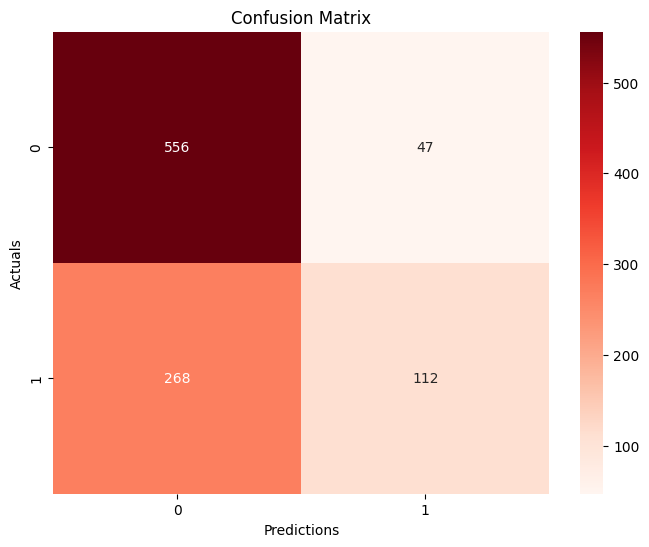

In [50]:

print("Confusion Matrix")
cm = confusion_matrix(testY, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Reds', fmt='g')
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Confusion Matrix')
plt.show()



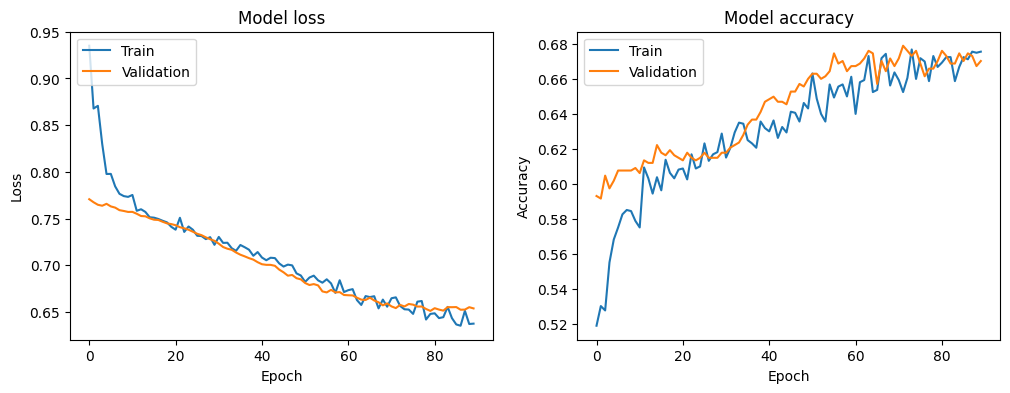

In [51]:
# Summary of the process and results
# Plot training & validation loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"], loc="upper left")

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"], loc="upper left")
plt.show()
